In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
df = pd.read_csv('/content/drive/MyDrive/kaggle datasets/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
null = df.isnull().sum()/len(df)
null

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64

In [4]:
df.drop(['airline_sentiment_gold','negativereason_gold','tweet_coord'],axis=1,inplace=True)


negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


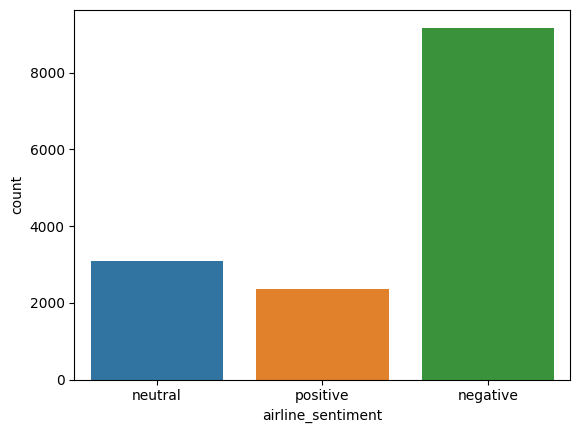

In [5]:
print(df['airline_sentiment'].value_counts())
sns.countplot(data=df,x='airline_sentiment')
plt.show()

In [9]:
print(df['airline_sentiment'].value_counts())

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


In [10]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

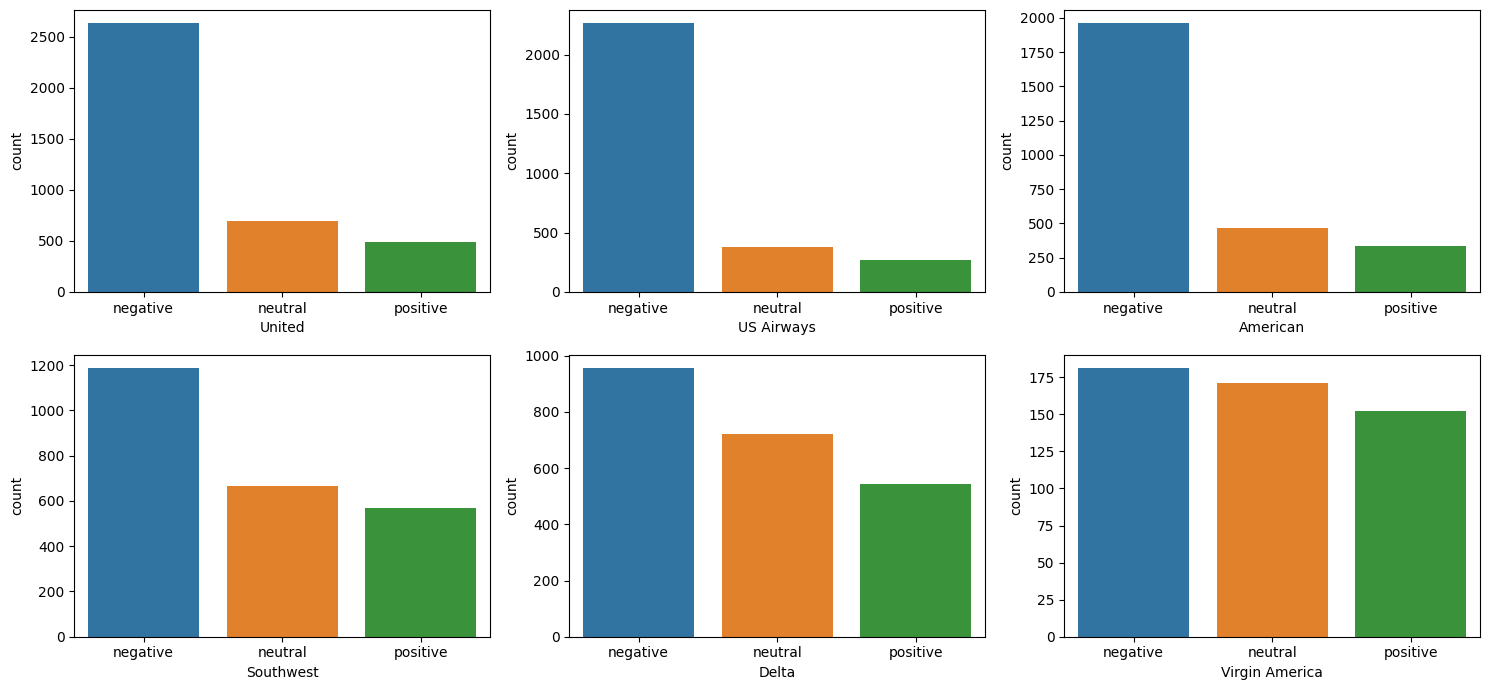

In [11]:
def plot_sentiment(Airline):
    df1 = df[df['airline']==Airline]
    count=df1['airline_sentiment'].value_counts().reset_index().rename(columns={'index':Airline,'airline_sentiment':'count'})
    sns.barplot(data=count,x=Airline,y='count')

plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
plot_sentiment('United')
plt.subplot(2,3,2)
plot_sentiment('US Airways')
plt.subplot(2,3,3)
plot_sentiment('American')
plt.subplot(2,3,4)
plot_sentiment('Southwest')
plt.subplot(2,3,5)
plot_sentiment('Delta')
plt.subplot(2,3,6)
plot_sentiment('Virgin America')
plt.tight_layout()

plt.show()

In [12]:
df['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

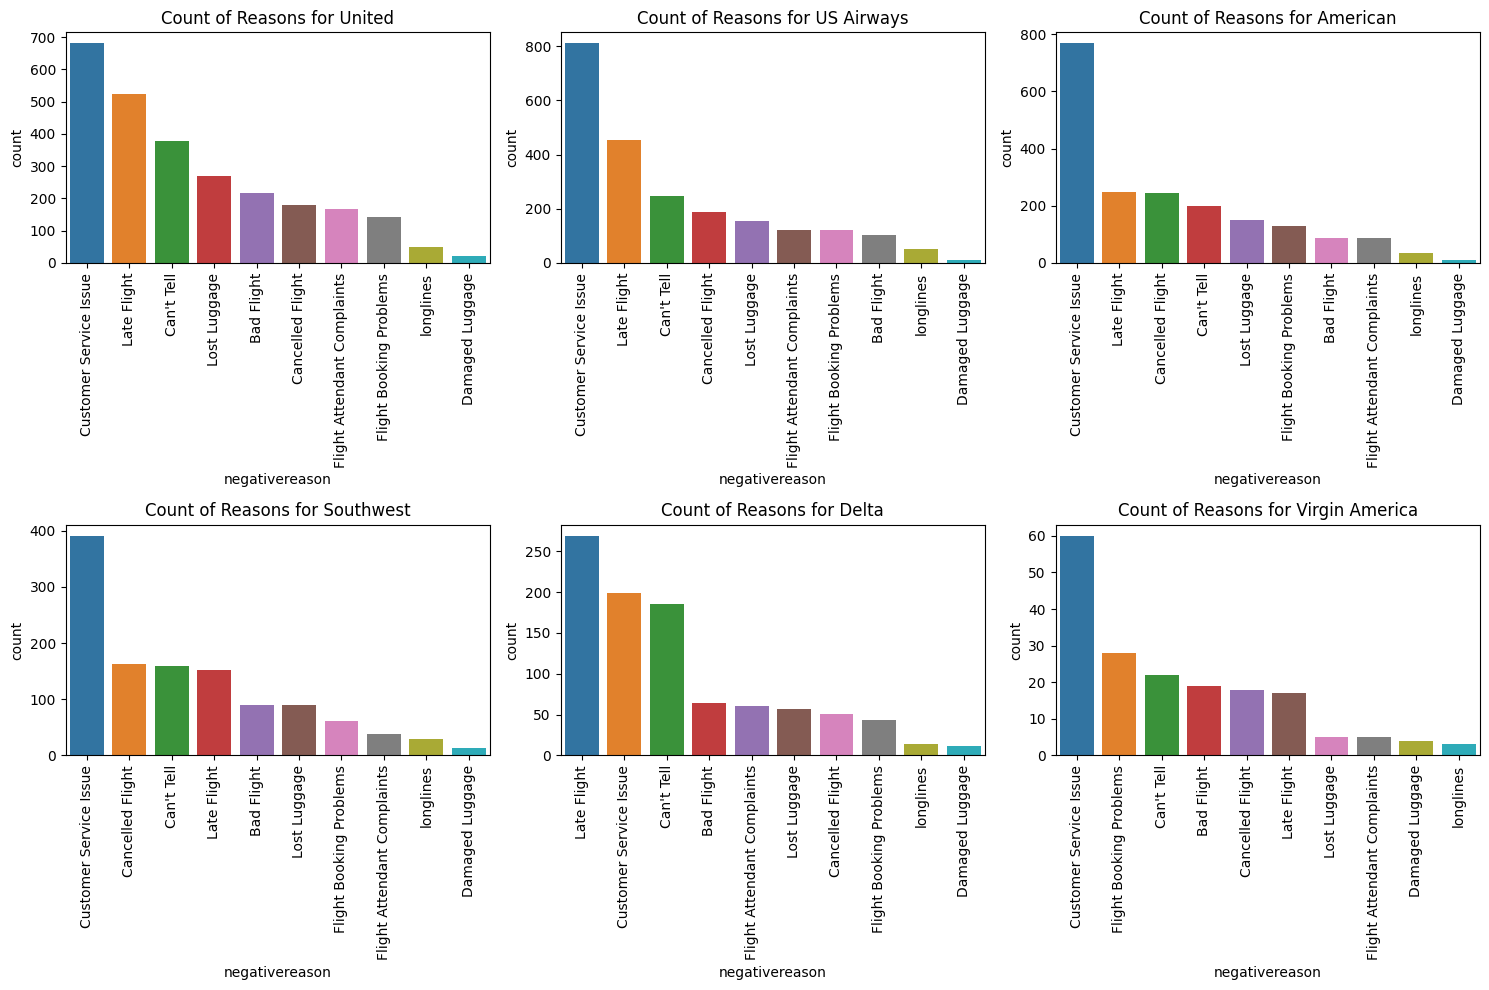

In [13]:
def plot_reason(Airline):
    df2 = df[df['airline']==Airline]
    count=df2['negativereason'].value_counts().reset_index().rename(columns={'index':'negativereason','negativereason':'count'})
    sns.barplot(data=count,x='negativereason',y='count')
    plt.title('Count of Reasons for '+Airline)
    plt.xticks(rotation=90)
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plot_reason('United')
plt.subplot(2,3,2)
plot_reason('US Airways')
plt.subplot(2,3,3)
plot_reason('American')
plt.subplot(2,3,4)
plot_reason('Southwest')
plt.subplot(2,3,5)
plot_reason('Delta')
plt.subplot(2,3,6)
plot_reason('Virgin America')
plt.tight_layout()
plt.show()

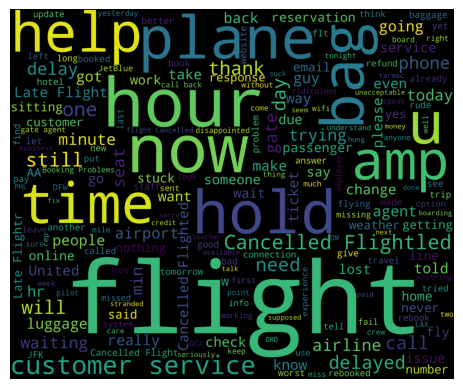

In [14]:
from wordcloud import WordCloud,STOPWORDS

df3 = df[df['airline_sentiment']=='negative']
words = ' '.join(df3['text'])
cleaned_word = ' '.join([word for word in words.split() if 'http' not in word and not word.startswith('@') and word!='RT'])

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
def tweet_to_words(tweet):
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return ' '.join(meaningful_word)

In [22]:
def tweet_len(tweet):
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return (len(meaningful_word))

In [23]:
df['sentiment'] = df['airline_sentiment'].apply(lambda x:0 if x=='negative' else 1)
df['clean_tweet'] = df['text'].apply(lambda x:tweet_to_words(x))
df['tweet_length'] = df['text'].apply(lambda x:tweet_len(x))
train, test = train_test_split(df,test_size=0.2,random_state=42)

In [25]:
train_clean_tweet = []
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet = []
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer='word')
train_features = v.fit_transform(train_clean_tweet)
test_features = v.transform(test_clean_tweet)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [36]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
   try:
      fit = classifier.fit(train_features,train['sentiment'])
      pred = fit.predict(test_features)
   except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
        accuracy = accuracy_score(pred,test['sentiment'])
        Accuracy.append(accuracy)
        Model.append(classifier.__class__.__name__)
        print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy)) 

NameError: ignored

In [ ]:
result = pd.DataFrame({'Models':Model})
result['Accuracy'] = Accuracy
result = result.sort_values(by='Accuracy',ascending=False)
result